In [1]:
#importing required libraries
from selenium import webdriver
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#webdriver
driver = webdriver.Chrome()

In [3]:
titles=[]
companies=[]
reviews=[]
Review_count=[]
experience=[]
Salary=[]
Location=[]
Description=[]
Skills=[]
urls=[]

In [34]:
for i in range(1,26):
    url="https://www.naukri.com/jobs-in-hyderabad-secunderabad-"+str(i)+"?functionAreaIdGid=5"
    driver = webdriver.Chrome()
    driver.get(url)
    time.sleep(3)
    soup = BeautifulSoup(driver.page_source)
    driver.close()
    results = soup.find(class_='list')
    jobs = results.find_all('article',class_='jobTuple bgWhite br4 mb-8')
    for job in jobs:
        Title=job.find('a',class_='title fw500 ellipsis').text
        titles.append(Title)
        
        company=job.find('a',class_='subTitle ellipsis fleft').text
        companies.append(company)
        
        stars=job.find('span',class_='starRating fleft dot').text
        reviews.append(float(stars))
        
        review_count=job.find('a',class_='reviewsCount ml-5 fleft blue-text').text
        review_count=review_count[1:-1]
        review_count=review_count.replace(' Reviews','')
        Review_count.append(int(review_count))
        
        exp=job.find(class_='fleft grey-text br2 placeHolderLi experience').text
        exp=exp.replace(' Yrs','')
        experience.append(exp)
        
        salary=job.find(class_='fleft grey-text br2 placeHolderLi salary').text
        Salary.append((salary.replace(' PA.','')))
        
        locations=job.find(class_='fleft grey-text br2 placeHolderLi location').text
        Location.append(locations)
        
        description=job.find(class_='job-description fs12 grey-text').text
        Description.append(description)
        
        key_skills=job.find(class_='tags has-description').text
        Skills.append(key_skills)
        
        URL=job.find('a',class_='title fw500 ellipsis').get('href')
        urls.append(URL)

In [37]:
df = pd.DataFrame({
    'Title':titles,
    'Company':companies,
    'Ratings':reviews,
    'Reviews':Review_count,
    'Experience':experience,
    'Salary':Salary,
    'Locations':Location,
    'Description':Description,
    'Key Roles':Skills,
    'URL':urls
})

In [38]:
df.head()

,Title,Company,Ratings,Reviews,Experience,Salary,Locations,Description,Key Roles,URL
0,Java Developer,Cognizant,4.0,26999,3-8,Not disclosed,"Hyderabad/Secunderabad, Kochi/Cochin, Kolkata,...",Cognizant is now hiring Java Developers with ...,javaSpring BootMicroservicesHibernateSpringBoo...,https://www.naukri.com/job-listings-java-devel...
1,Assistant Manager - UX,CitiusTech,4.1,663,3-7,Not disclosed,"Hyderabad/Secunderabad, Mumbai, Pune, Chennai,...",Graduate with 4+ years of professional experi...,AxureAdobe CCanalyticalcommunicationcommunicat...,https://www.naukri.com/job-listings-assistant-...
2,Technical Lead - I Spark,CitiusTech,4.1,663,3-9,Not disclosed,"Hyderabad/Secunderabad, Mumbai, Pune, Chennai,...",Should be able to work in evening shift Shoul...,AgileTFSGitHubcommunicationsCI / CDpresentatio...,https://www.naukri.com/job-listings-technical-...
3,CitiusTech is hiring For Mulesoft Developer- 5...,CitiusTech,4.1,663,5-8,Not disclosed,"Hyderabad/Secunderabad, Pune, Gurgaon/Gurugram...","Technical LeadLocation Mumbai, Bangalore, Pun...",ConnectorsDataweaveMulesoft ApiIT SkillsSalesf...,https://www.naukri.com/job-listings-citiustech...
4,Urgent Requirement For Guidewire developer,PwC,3.8,3692,5-10,Not disclosed,"Hyderabad/Secunderabad, Kolkata, Pune, Ahmedab...","Dear CandidatePWC is hiring GW_PC, BC Develop...",IT SkillsCloudDevOpsOracleAWSAzurepolicy cente...,https://www.naukri.com/job-listings-urgent-req...


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        521 non-null    object 
 1   Company      521 non-null    object 
 2   Ratings      521 non-null    float64
 3   Reviews      521 non-null    int64  
 4   Experience   521 non-null    object 
 5   Salary       521 non-null    object 
 6   Locations    521 non-null    object 
 7   Description  521 non-null    object 
 8   Key Roles    521 non-null    object 
 9   URL          521 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 40.8+ KB


In [39]:
df['Company'].value_counts()

TATA CONSULTANCY SERVICES (TCS)                                            105
Cognizant                                                                   47
CitiusTech                                                                  31
Patch Infotech Private Limited                                              29
Capgemini                                                                   27
Infosys                                                                     26
PwC                                                                         25
Tech Mahindra                                                               24
Xoriant                                                                     22
Virtusa                                                                     19
GlobalLogic                                                                 16
TeamLease                                                                   14
HCL Technologies                                    

In [61]:
#taking entries of top 15 companies
df1=df.loc[(df['Company']=='TATA CONSULTANCY SERVICES (TCS)') 
           | (df['Company']=='Cognizant') 
           | (df['Company']=='Patch Infotech Private Limited')
           | (df['Company']=='Capgemini')
           | (df['Company']=='CitiusTech')
           | (df['Company']=='Xoriant')
           | (df['Company']=='Infosys')
           | (df['Company']=='Tech Mahindra')
           | (df['Company']=='PwC')
           | (df['Company']=='Virtusa')
           | (df['Company']=='Genpact')
           | (df['Company']=='Oracle')
           | (df['Company']=='HCL Technologies')
           | (df['Company']=='TeamLease')
           | (df['Company']=='GlobalLogic')]

In [62]:
df1.head()

,Title,Company,Ratings,Reviews,Experience,Salary,Locations,Description,Key Roles,URL
0,Java Developer,Cognizant,4.0,26999,3-8,Not disclosed,"Hyderabad/Secunderabad, Kochi/Cochin, Kolkata,...",Cognizant is now hiring Java Developers with ...,javaSpring BootMicroservicesHibernateSpringBoo...,https://www.naukri.com/job-listings-java-devel...
1,Assistant Manager - UX,CitiusTech,4.1,663,3-7,Not disclosed,"Hyderabad/Secunderabad, Mumbai, Pune, Chennai,...",Graduate with 4+ years of professional experi...,AxureAdobe CCanalyticalcommunicationcommunicat...,https://www.naukri.com/job-listings-assistant-...
2,Technical Lead - I Spark,CitiusTech,4.1,663,3-9,Not disclosed,"Hyderabad/Secunderabad, Mumbai, Pune, Chennai,...",Should be able to work in evening shift Shoul...,AgileTFSGitHubcommunicationsCI / CDpresentatio...,https://www.naukri.com/job-listings-technical-...
3,CitiusTech is hiring For Mulesoft Developer- 5...,CitiusTech,4.1,663,5-8,Not disclosed,"Hyderabad/Secunderabad, Pune, Gurgaon/Gurugram...","Technical LeadLocation Mumbai, Bangalore, Pun...",ConnectorsDataweaveMulesoft ApiIT SkillsSalesf...,https://www.naukri.com/job-listings-citiustech...
4,Urgent Requirement For Guidewire developer,PwC,3.8,3692,5-10,Not disclosed,"Hyderabad/Secunderabad, Kolkata, Pune, Ahmedab...","Dear CandidatePWC is hiring GW_PC, BC Develop...",IT SkillsCloudDevOpsOracleAWSAzurepolicy cente...,https://www.naukri.com/job-listings-urgent-req...


In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 520
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        418 non-null    object 
 1   Company      418 non-null    object 
 2   Ratings      418 non-null    float64
 3   Reviews      418 non-null    int64  
 4   Experience   418 non-null    object 
 5   Salary       418 non-null    object 
 6   Locations    418 non-null    object 
 7   Description  418 non-null    object 
 8   Key Roles    418 non-null    object 
 9   URL          418 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 35.9+ KB


In [75]:
#checking for duplicates
df1.duplicated().sum()

20

In [76]:
#drop duplicates
df1.drop_duplicates(inplace=True)

C:\Users\NIVAS\AppData\Local\Temp\ipykernel_9320\4156330626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)


In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 520
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        398 non-null    object 
 1   Company      398 non-null    object 
 2   Ratings      398 non-null    float64
 3   Reviews      398 non-null    int64  
 4   Experience   398 non-null    object 
 5   Salary       398 non-null    object 
 6   Locations    398 non-null    object 
 7   Description  398 non-null    object 
 8   Key Roles    398 non-null    object 
 9   URL          398 non-null    object 
 10  Min_exp      398 non-null    int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 37.3+ KB


In [81]:
df1['Company'].value_counts()

TATA CONSULTANCY SERVICES (TCS)    102
Cognizant                           46
CitiusTech                          29
Capgemini                           26
PwC                                 25
Patch Infotech Private Limited      24
Tech Mahindra                       24
Xoriant                             22
Infosys                             21
Virtusa                             19
GlobalLogic                         16
TeamLease                           14
Genpact                             11
HCL Technologies                    10
Oracle                               9
Name: Company, dtype: int64

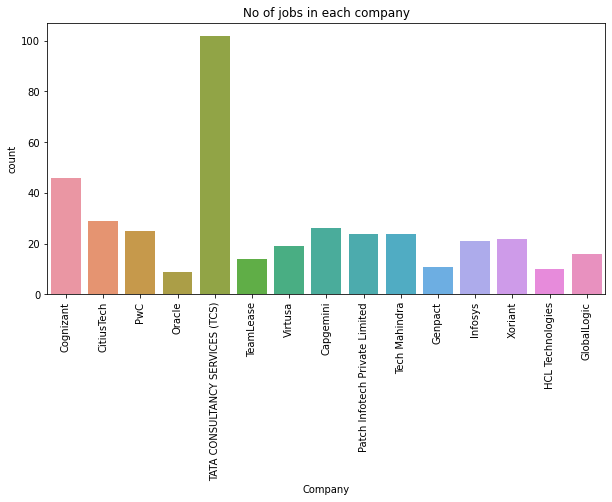

In [82]:
#company vs no.of jobs
plt.figure(figsize=(10,5))
plt.title('No of jobs in each company')
sns.countplot(data=df1,x='Company')
plt.xticks(rotation=90)
plt.show()

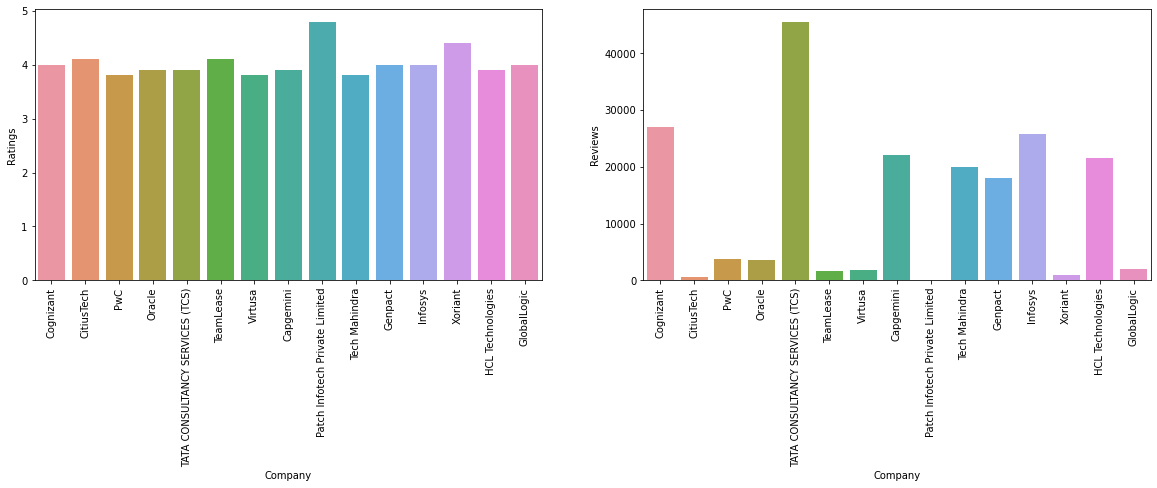

In [83]:
plt.figure(figsize=(20,5))
#company vs ratings
plt.subplot(1,2,1)
sns.barplot(data=df1,x='Company',y='Ratings')
plt.xticks(rotation=90)
#company vs reviews
plt.subplot(1,2,2)
sns.barplot(data=df1,x='Company',y='Reviews')
plt.xticks(rotation=90)
plt.show()

In [78]:
#add a column of minimum expirience
min_exp=[]
for i in df1['Experience']:
    min_exp.append(int(i.split('-')[0]))
min_exp
df1['Min_exp']=min_exp
df1.head()

C:\Users\NIVAS\AppData\Local\Temp\ipykernel_9320\531191135.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Min_exp']=min_exp


,Title,Company,Ratings,Reviews,Experience,Salary,Locations,Description,Key Roles,URL,Min_exp
0,Java Developer,Cognizant,4.0,26999,3-8,Not disclosed,"Hyderabad/Secunderabad, Kochi/Cochin, Kolkata,...",Cognizant is now hiring Java Developers with ...,javaSpring BootMicroservicesHibernateSpringBoo...,https://www.naukri.com/job-listings-java-devel...,3
1,Assistant Manager - UX,CitiusTech,4.1,663,3-7,Not disclosed,"Hyderabad/Secunderabad, Mumbai, Pune, Chennai,...",Graduate with 4+ years of professional experi...,AxureAdobe CCanalyticalcommunicationcommunicat...,https://www.naukri.com/job-listings-assistant-...,3
2,Technical Lead - I Spark,CitiusTech,4.1,663,3-9,Not disclosed,"Hyderabad/Secunderabad, Mumbai, Pune, Chennai,...",Should be able to work in evening shift Shoul...,AgileTFSGitHubcommunicationsCI / CDpresentatio...,https://www.naukri.com/job-listings-technical-...,3
3,CitiusTech is hiring For Mulesoft Developer- 5...,CitiusTech,4.1,663,5-8,Not disclosed,"Hyderabad/Secunderabad, Pune, Gurgaon/Gurugram...","Technical LeadLocation Mumbai, Bangalore, Pun...",ConnectorsDataweaveMulesoft ApiIT SkillsSalesf...,https://www.naukri.com/job-listings-citiustech...,5
4,Urgent Requirement For Guidewire developer,PwC,3.8,3692,5-10,Not disclosed,"Hyderabad/Secunderabad, Kolkata, Pune, Ahmedab...","Dear CandidatePWC is hiring GW_PC, BC Develop...",IT SkillsCloudDevOpsOracleAWSAzurepolicy cente...,https://www.naukri.com/job-listings-urgent-req...,5


In [79]:
df1['Min_exp'].describe()

count    398.000000
mean       3.922111
std        2.202921
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max       13.000000
Name: Min_exp, dtype: float64

In [80]:
#jobs that require maximum expirience
df1[df1['Min_exp']==13]

,Title,Company,Ratings,Reviews,Experience,Salary,Locations,Description,Key Roles,URL,Min_exp
303,FCCS-EPM-Cloud,HCL Technologies,3.9,21555,13-15,"22,50,000 - 25,00,000","Hyderabad/Secunderabad, Kolkata, Pune, Chennai...",Good knowledge in Oracle EPM Cloud modules - ...,FccsOracle EPM CloudcommunicationIT SkillsClou...,https://www.naukri.com/job-listings-fccs-epm-c...,13
481,MCS - Platform and DevOps Technologies- Senior...,PwC,3.8,3692,13-23,Not disclosed,"Hyderabad/Secunderabad, Bangalore/Bengaluru",Experience in administration of other associa...,Business servicesInvoice processingFinancial s...,https://www.naukri.com/job-listings-mcs-platfo...,13


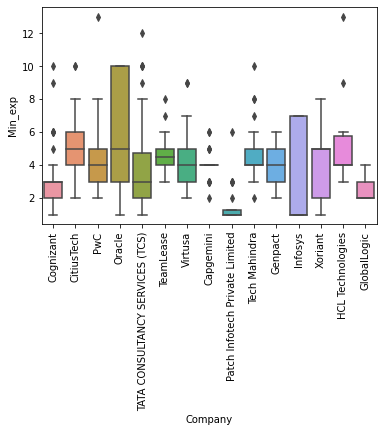

In [84]:
#company vs minimum expirience
sns.boxplot(data=df1,x='Company',y='Min_exp')
plt.xticks(rotation=90)
plt.show()

In [85]:
#add a column of average salary for each job
avg_sal=[]
df1['Salary']=df1['Salary'].str.replace('Not disclosed','0 - 0')
df1['Salary']=df1['Salary'].str.replace(',','')
for i in df1['Salary']:
    a=int(i.split(' - ')[0])
    b=int(i.split(' - ')[1])
    avg_sal.append((a+b)/2)
df1['Avg_sal']=avg_sal
df1.head()

C:\Users\NIVAS\AppData\Local\Temp\ipykernel_9320\309609994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Salary']=df1['Salary'].str.replace('Not disclosed','0 - 0')
C:\Users\NIVAS\AppData\Local\Temp\ipykernel_9320\309609994.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Salary']=df1['Salary'].str.replace(',','')
C:\Users\NIVAS\AppData\Local\Temp\ipykernel_9320\309609994.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

,Title,Company,Ratings,Reviews,Experience,Salary,Locations,Description,Key Roles,URL,Min_exp,Avg_sal
0,Java Developer,Cognizant,4.0,26999,3-8,0 - 0,"Hyderabad/Secunderabad, Kochi/Cochin, Kolkata,...",Cognizant is now hiring Java Developers with ...,javaSpring BootMicroservicesHibernateSpringBoo...,https://www.naukri.com/job-listings-java-devel...,3,0.0
1,Assistant Manager - UX,CitiusTech,4.1,663,3-7,0 - 0,"Hyderabad/Secunderabad, Mumbai, Pune, Chennai,...",Graduate with 4+ years of professional experi...,AxureAdobe CCanalyticalcommunicationcommunicat...,https://www.naukri.com/job-listings-assistant-...,3,0.0
2,Technical Lead - I Spark,CitiusTech,4.1,663,3-9,0 - 0,"Hyderabad/Secunderabad, Mumbai, Pune, Chennai,...",Should be able to work in evening shift Shoul...,AgileTFSGitHubcommunicationsCI / CDpresentatio...,https://www.naukri.com/job-listings-technical-...,3,0.0
3,CitiusTech is hiring For Mulesoft Developer- 5...,CitiusTech,4.1,663,5-8,0 - 0,"Hyderabad/Secunderabad, Pune, Gurgaon/Gurugram...","Technical LeadLocation Mumbai, Bangalore, Pun...",ConnectorsDataweaveMulesoft ApiIT SkillsSalesf...,https://www.naukri.com/job-listings-citiustech...,5,0.0
4,Urgent Requirement For Guidewire developer,PwC,3.8,3692,5-10,0 - 0,"Hyderabad/Secunderabad, Kolkata, Pune, Ahmedab...","Dear CandidatePWC is hiring GW_PC, BC Develop...",IT SkillsCloudDevOpsOracleAWSAzurepolicy cente...,https://www.naukri.com/job-listings-urgent-req...,5,0.0


In [90]:
df1['Avg_sal'].describe()

count    3.980000e+02
mean     2.273116e+05
std      5.136963e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.750000e+06
Name: Avg_sal, dtype: float64

In [92]:
df1['Avg_sal'].value_counts()

0.0          314
1000000.0      8
1200000.0      6
1500000.0      6
175000.0       5
1700000.0      4
550000.0       4
1300000.0      3
850000.0       3
600000.0       3
900000.0       3
2000000.0      3
1150000.0      3
800000.0       2
575000.0       2
1450000.0      2
500000.0       2
1100000.0      2
450000.0       2
1400000.0      1
700000.0       1
712500.0       1
650000.0       1
2250000.0      1
2300000.0      1
1600000.0      1
2375000.0      1
2750000.0      1
1800000.0      1
1125000.0      1
587500.0       1
1050000.0      1
1250000.0      1
87500.0        1
362500.0       1
625000.0       1
2500000.0      1
1325000.0      1
725000.0       1
70000.0        1
Name: Avg_sal, dtype: int64

In [109]:
int(df1.Avg_sal.mean())

227311

In [99]:
#job with maximum average salary
df1[df1['Avg_sal']==df1.Avg_sal.max()]

,Title,Company,Ratings,Reviews,Experience,Salary,Locations,Description,Key Roles,URL,Min_exp,Avg_sal
290,Oracle Supply Chain Management Functional Solu...,Oracle,3.9,3627,10-20,2000000 - 3500000,"Hyderabad/Secunderabad, Pune, Chennai, Bangalo...",Oracle Consulting Solution Center Solution Ar...,supply chain managementIT SkillsCloudOraclePro...,https://www.naukri.com/job-listings-oracle-sup...,10,2750000.0


In [110]:
#remove 0s with average in avg_sal
df1['Avg_sal'].replace(to_replace = 0, value = int(df1.Avg_sal.mean()), inplace=True)
df1.head()

C:\Users\NIVAS\AppData\Local\Temp\ipykernel_9320\3096928552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Avg_sal'].replace(to_replace = 0, value = int(df1.Avg_sal.mean()), inplace=True)


,Title,Company,Ratings,Reviews,Experience,Salary,Locations,Description,Key Roles,URL,Min_exp,Avg_sal,Min_sal
0,Java Developer,Cognizant,4.0,26999,3-8,0 - 0,"Hyderabad/Secunderabad, Kochi/Cochin, Kolkata,...",Cognizant is now hiring Java Developers with ...,javaSpring BootMicroservicesHibernateSpringBoo...,https://www.naukri.com/job-listings-java-devel...,3,227311.0,0
1,Assistant Manager - UX,CitiusTech,4.1,663,3-7,0 - 0,"Hyderabad/Secunderabad, Mumbai, Pune, Chennai,...",Graduate with 4+ years of professional experi...,AxureAdobe CCanalyticalcommunicationcommunicat...,https://www.naukri.com/job-listings-assistant-...,3,227311.0,0
2,Technical Lead - I Spark,CitiusTech,4.1,663,3-9,0 - 0,"Hyderabad/Secunderabad, Mumbai, Pune, Chennai,...",Should be able to work in evening shift Shoul...,AgileTFSGitHubcommunicationsCI / CDpresentatio...,https://www.naukri.com/job-listings-technical-...,3,227311.0,0
3,CitiusTech is hiring For Mulesoft Developer- 5...,CitiusTech,4.1,663,5-8,0 - 0,"Hyderabad/Secunderabad, Pune, Gurgaon/Gurugram...","Technical LeadLocation Mumbai, Bangalore, Pun...",ConnectorsDataweaveMulesoft ApiIT SkillsSalesf...,https://www.naukri.com/job-listings-citiustech...,5,227311.0,0
4,Urgent Requirement For Guidewire developer,PwC,3.8,3692,5-10,0 - 0,"Hyderabad/Secunderabad, Kolkata, Pune, Ahmedab...","Dear CandidatePWC is hiring GW_PC, BC Develop...",IT SkillsCloudDevOpsOracleAWSAzurepolicy cente...,https://www.naukri.com/job-listings-urgent-req...,5,227311.0,0


In [111]:
min_sal=[]
for i in df1['Salary']:
    a=int(i.split(' - ')[0])
    min_sal.append(a)
df1['Min_sal']=min_sal
df1.head()

C:\Users\NIVAS\AppData\Local\Temp\ipykernel_9320\428979547.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Min_sal']=min_sal


,Title,Company,Ratings,Reviews,Experience,Salary,Locations,Description,Key Roles,URL,Min_exp,Avg_sal,Min_sal
0,Java Developer,Cognizant,4.0,26999,3-8,0 - 0,"Hyderabad/Secunderabad, Kochi/Cochin, Kolkata,...",Cognizant is now hiring Java Developers with ...,javaSpring BootMicroservicesHibernateSpringBoo...,https://www.naukri.com/job-listings-java-devel...,3,227311.0,0
1,Assistant Manager - UX,CitiusTech,4.1,663,3-7,0 - 0,"Hyderabad/Secunderabad, Mumbai, Pune, Chennai,...",Graduate with 4+ years of professional experi...,AxureAdobe CCanalyticalcommunicationcommunicat...,https://www.naukri.com/job-listings-assistant-...,3,227311.0,0
2,Technical Lead - I Spark,CitiusTech,4.1,663,3-9,0 - 0,"Hyderabad/Secunderabad, Mumbai, Pune, Chennai,...",Should be able to work in evening shift Shoul...,AgileTFSGitHubcommunicationsCI / CDpresentatio...,https://www.naukri.com/job-listings-technical-...,3,227311.0,0
3,CitiusTech is hiring For Mulesoft Developer- 5...,CitiusTech,4.1,663,5-8,0 - 0,"Hyderabad/Secunderabad, Pune, Gurgaon/Gurugram...","Technical LeadLocation Mumbai, Bangalore, Pun...",ConnectorsDataweaveMulesoft ApiIT SkillsSalesf...,https://www.naukri.com/job-listings-citiustech...,5,227311.0,0
4,Urgent Requirement For Guidewire developer,PwC,3.8,3692,5-10,0 - 0,"Hyderabad/Secunderabad, Kolkata, Pune, Ahmedab...","Dear CandidatePWC is hiring GW_PC, BC Develop...",IT SkillsCloudDevOpsOracleAWSAzurepolicy cente...,https://www.naukri.com/job-listings-urgent-req...,5,227311.0,0


In [105]:
df1['Min_sal'].describe()

count    3.980000e+02
mean     1.523869e+05
std      3.693005e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.250000e+06
Name: Min_sal, dtype: float64

In [107]:
df1['Min_sal'].value_counts()

0          314
500000      11
700000       8
300000       7
50000        7
800000       6
1000000      6
1500000      4
1200000      4
600000       4
2000000      3
950000       3
400000       2
650000       2
350000       2
325000       2
475000       2
200000       2
375000       1
900000       1
1300000      1
425000       1
750000       1
2250000      1
1600000      1
450000       1
1400000      1
Name: Min_sal, dtype: int64

In [112]:
#job with maximum minimum-salary
df1[df1['Min_sal']==df1.Min_sal.max()]

,Title,Company,Ratings,Reviews,Experience,Salary,Locations,Description,Key Roles,URL,Min_exp,Avg_sal,Min_sal
303,FCCS-EPM-Cloud,HCL Technologies,3.9,21555,13-15,2250000 - 2500000,"Hyderabad/Secunderabad, Kolkata, Pune, Chennai...",Good knowledge in Oracle EPM Cloud modules - ...,FccsOracle EPM CloudcommunicationIT SkillsClou...,https://www.naukri.com/job-listings-fccs-epm-c...,13,2375000.0,2250000


In [114]:
int(df1.Min_sal.mean())

152386

In [115]:
#remove 0s with average in min_sal
df1['Min_sal'].replace(to_replace = 0, value = int(df1.Min_sal.mean()), inplace=True)
df1.head()

C:\Users\NIVAS\AppData\Local\Temp\ipykernel_9320\3467110404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Min_sal'].replace(to_replace = 0, value = int(df1.Min_sal.mean()), inplace=True)


,Title,Company,Ratings,Reviews,Experience,Salary,Locations,Description,Key Roles,URL,Min_exp,Avg_sal,Min_sal
0,Java Developer,Cognizant,4.0,26999,3-8,0 - 0,"Hyderabad/Secunderabad, Kochi/Cochin, Kolkata,...",Cognizant is now hiring Java Developers with ...,javaSpring BootMicroservicesHibernateSpringBoo...,https://www.naukri.com/job-listings-java-devel...,3,227311.0,152386
1,Assistant Manager - UX,CitiusTech,4.1,663,3-7,0 - 0,"Hyderabad/Secunderabad, Mumbai, Pune, Chennai,...",Graduate with 4+ years of professional experi...,AxureAdobe CCanalyticalcommunicationcommunicat...,https://www.naukri.com/job-listings-assistant-...,3,227311.0,152386
2,Technical Lead - I Spark,CitiusTech,4.1,663,3-9,0 - 0,"Hyderabad/Secunderabad, Mumbai, Pune, Chennai,...",Should be able to work in evening shift Shoul...,AgileTFSGitHubcommunicationsCI / CDpresentatio...,https://www.naukri.com/job-listings-technical-...,3,227311.0,152386
3,CitiusTech is hiring For Mulesoft Developer- 5...,CitiusTech,4.1,663,5-8,0 - 0,"Hyderabad/Secunderabad, Pune, Gurgaon/Gurugram...","Technical LeadLocation Mumbai, Bangalore, Pun...",ConnectorsDataweaveMulesoft ApiIT SkillsSalesf...,https://www.naukri.com/job-listings-citiustech...,5,227311.0,152386
4,Urgent Requirement For Guidewire developer,PwC,3.8,3692,5-10,0 - 0,"Hyderabad/Secunderabad, Kolkata, Pune, Ahmedab...","Dear CandidatePWC is hiring GW_PC, BC Develop...",IT SkillsCloudDevOpsOracleAWSAzurepolicy cente...,https://www.naukri.com/job-listings-urgent-req...,5,227311.0,152386


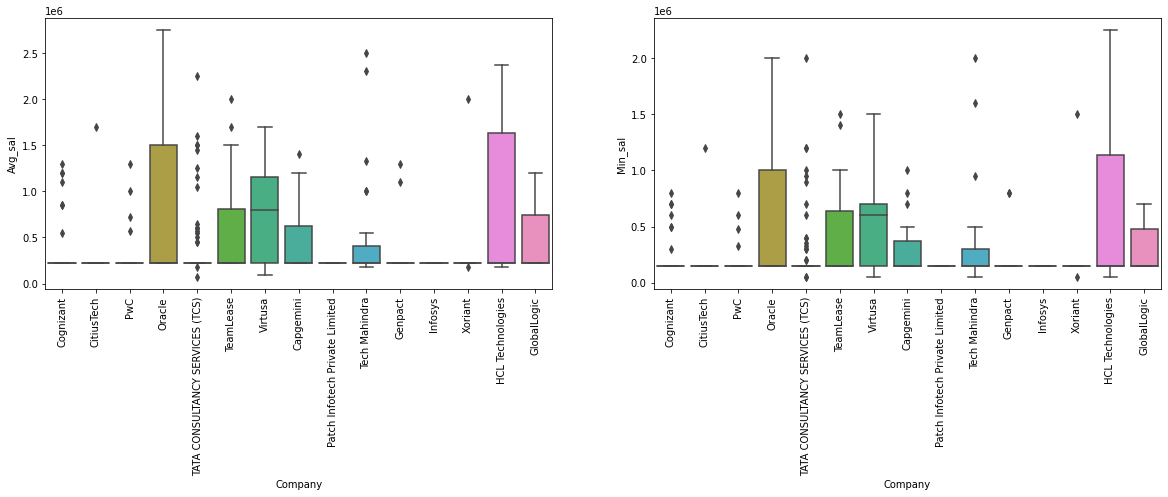

In [118]:
#company vs Avg_sal & Min_sal
plt.figure(figsize=(20,5))
#company vs ratings
plt.subplot(1,2,1)
sns.boxplot(data=df1,x='Company',y='Avg_sal')
plt.xticks(rotation=90)
#company vs reviews
plt.subplot(1,2,2)
sns.boxplot(data=df1,x='Company',y='Min_sal')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Company'>

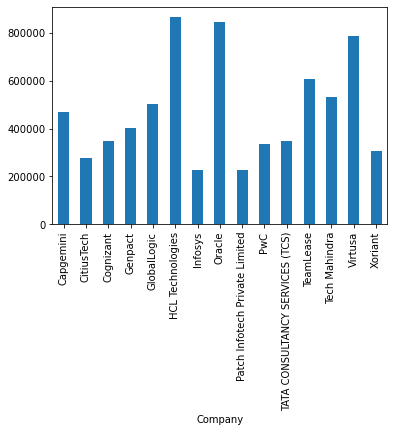

In [123]:
#average salary in each company
df1.groupby('Company')['Avg_sal'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Min_exp', ylabel='Avg_sal'>

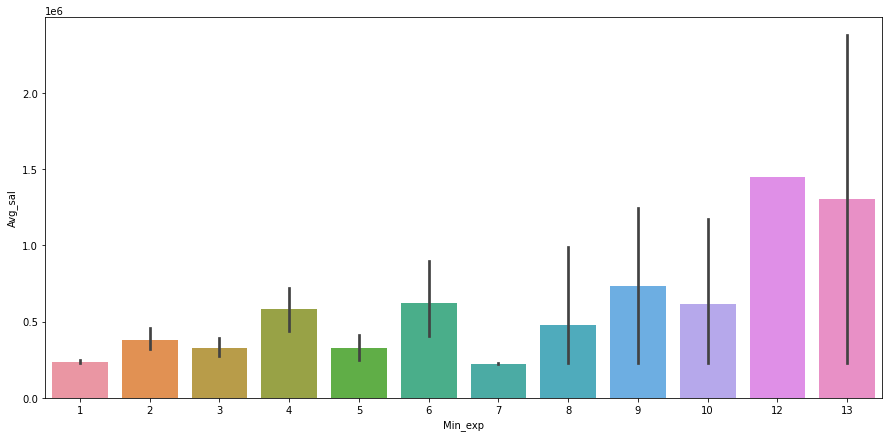

In [132]:
#minimum expirience vs average salary
plt.figure(figsize=(15,7))
sns.barplot(data=df1,x='Min_exp',y='Avg_sal')

In [134]:
df.to_csv("Naukri_Data.csv",index=False)